# Seaborn Basics


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

The goal of this exercise is to analyze a restaurant invoices and tips

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/refs/heads/master/tips.csv")

df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 1. Counting number of datapoints
---

❓ **On which day of the week are there more reservations at the restaurant?**
- Show this with a Seaborn "Countplot"
- Arrange days in week order (try using the `order` keyword argument)
- Don't use rainbow colors

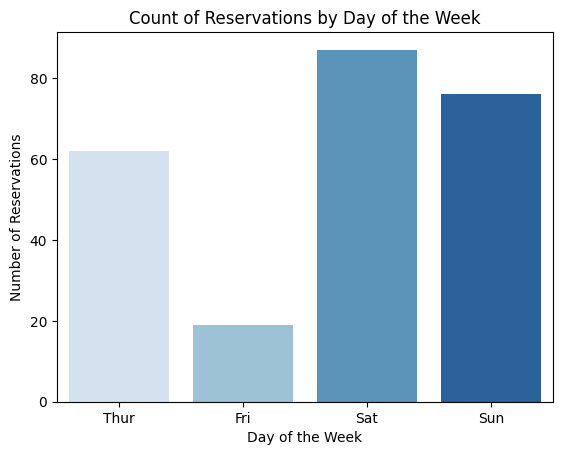

In [11]:

sns.countplot(data=df, x='day', order=['Thur', 'Fri', 'Sat', 'Sun'],palette='Blues')

plt.title("Count of Reservations by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Reservations")

plt.show()

❓ Add a second breakdown with (`sex`, `smoker` or `time`) on top of the `day` dimension in a visually meaningful manner

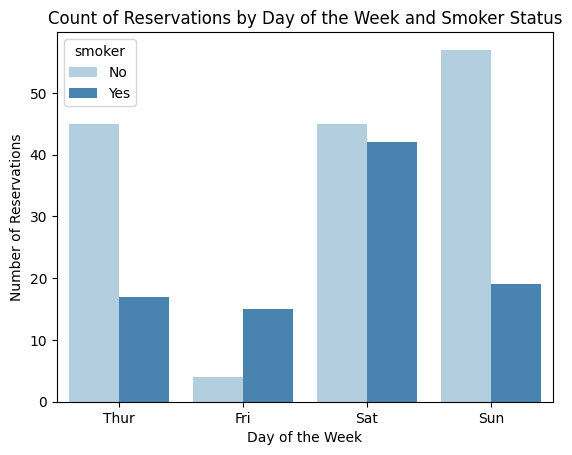

In [14]:
sns.countplot(data=df, x='day', hue='smoker', order=['Thur', 'Fri', 'Sat', 'Sun'], palette='Blues')

plt.title("Count of Reservations by Day of the Week and Smoker Status")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Reservations")

plt.show()

## 2. Plotting distributions of numeric values

Let's now analyse the `tips` values.

### 2.1 Simple distribution

❓ Plot a histogram with seaborn and try out different number of `bins`. Try to overlay the powerful kernel density estimator `kde` on top of the histogram

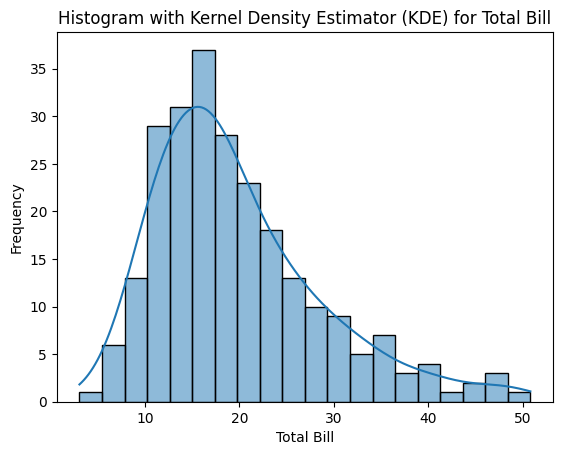

In [18]:
# Plot histogram with KDE overlay and different bin numbers
sns.histplot(df['total_bill'], kde=True, bins=20)

# Add title and labels
plt.title("Histogram with Kernel Density Estimator (KDE) for Total Bill")
plt.xlabel("Total Bill")
plt.ylabel("Frequency")

# Show the plot
plt.show()


### 2.1 Multiples distribution, same ax

❓ Try to reproduce the graph below, and make sure to understand the different `kinds` of catplots (`"bar"`, `"box"`, `"violin"`, `"boxen"`)

<img src="https://wagon-public-datasets.s3.amazonaws.com/02-Data-Toolkit/03-Data-Visualization/boxplot_example.png" width=350>

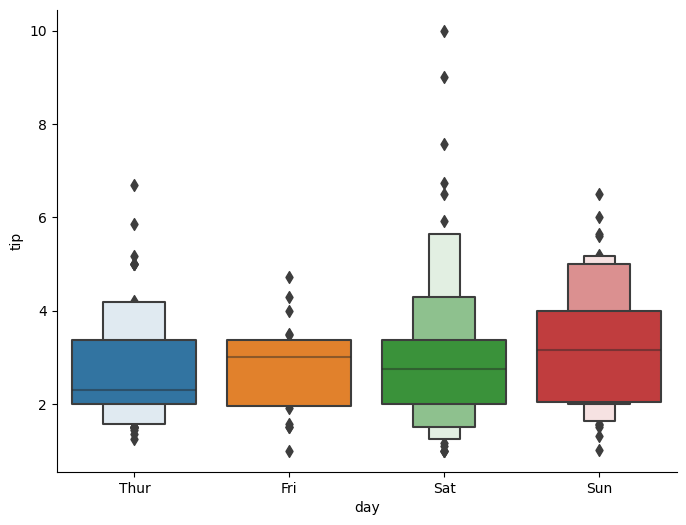

In [30]:
# Create the boxen plot using seaborn
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.boxenplot(x="day", y="tip", data=tips)  # Use boxenplot and specify data and palette

plt.xlabel("day")
plt.ylabel("tip")
# plt.title("Distribution of Tips by Day")  # Uncomment if you want a title

# Remove the top and right spines (optional, for cleaner look)
sns.despine()

# Show the plot
plt.show()

### 2.2 FacetGrid of distributions

❓ Let's look into the powerful [`seaborn.FacetGrid`](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html)

1. Run the cell below. What do you observe?
2. Change `plt.hist` inside `g.map` to another plotting function (like `sns.histplot` with `kde=True`, or even a bi-variate function like `sns.scatterplot`). Make sure to understand how this works!

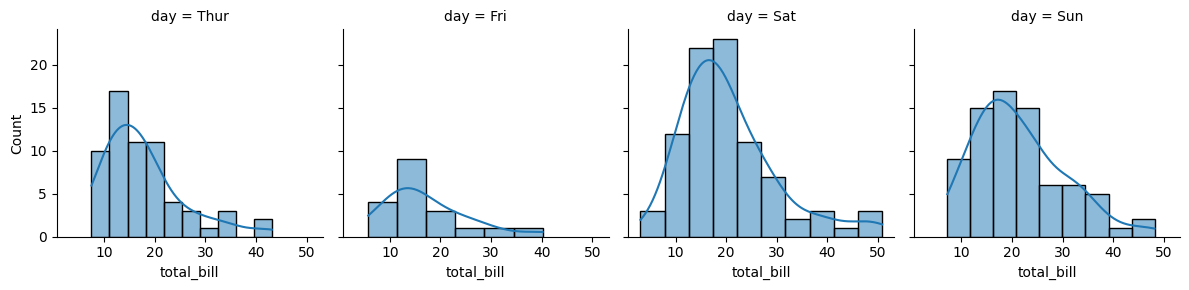

In [ ]:
g = sns.FacetGrid(tips, col="day", col_order=['Thur', 'Fri', 'Sat', 'Sun'])
g.map(sns.histplot, 'total_bill', kde=True);


❓ Let's add a `row="smoker"` and `hue="smoker"` parameter. 

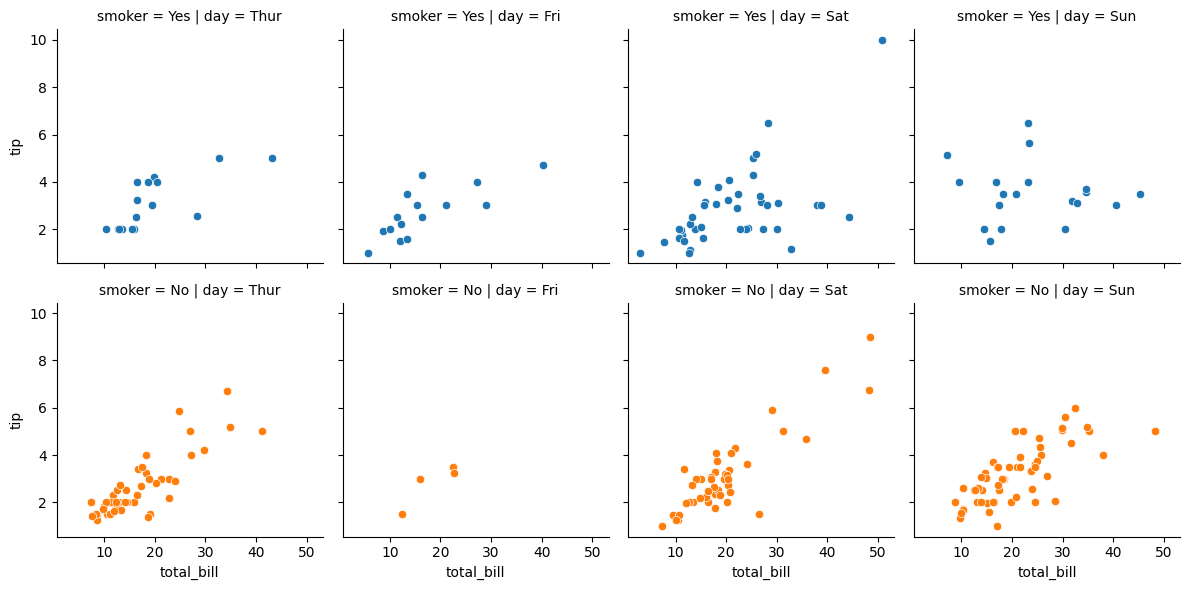

In [33]:
g = sns.FacetGrid(tips, col="day", row="smoker", hue="smoker",
                  col_order=['Thur', 'Fri', 'Sat', 'Sun'])
g.map(sns.scatterplot, 'total_bill', 'tip')

## Correlations

Let's start looking for correlation between  `tip` and `total_bill`


❓ First, *regress `tip`on `total_bill`* (scatterplot of `tips` on y-axis versus `total_bill` on x)

Text(0, 0.5, 'Tip')

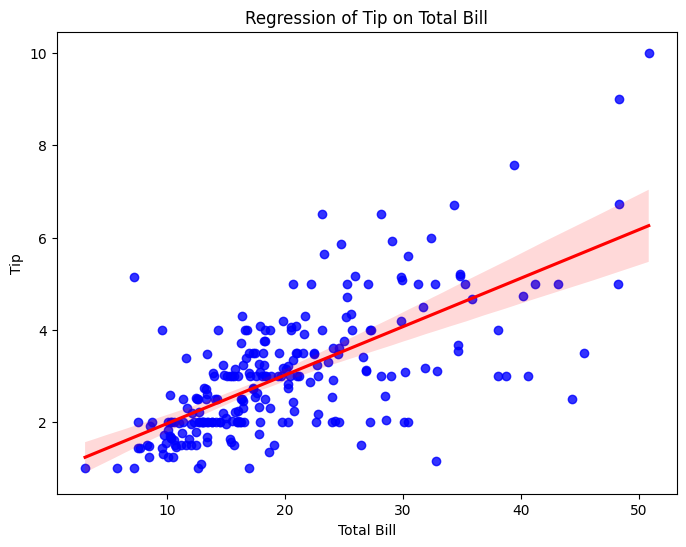

In [34]:
plt.figure(figsize=(8, 6))
sns.regplot(x='total_bill', y='tip', data=df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

# Add title and labels
plt.title("Regression of Tip on Total Bill")
plt.xlabel("Total Bill")
plt.ylabel("Tip")

❓ Another beautiful way of looking at this data is to use the [`seaborn.jointplot`](https://seaborn.pydata.org/generated/seaborn.jointplot.html)

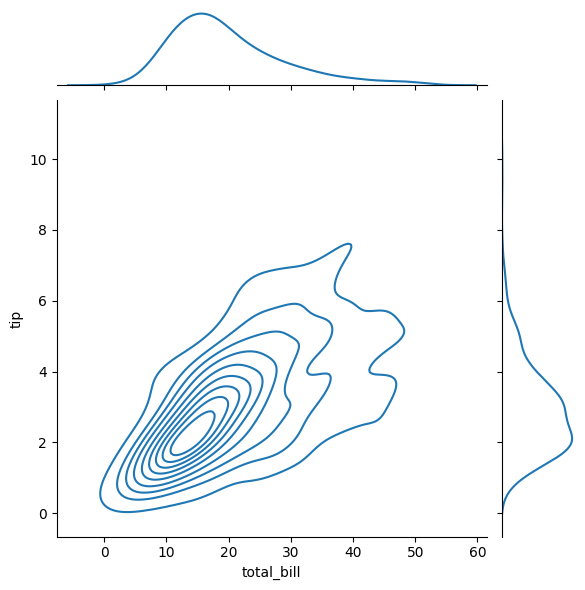

In [40]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='kde')
plt.show()


❓ Let's now compute a simple linear regression curve using `sns.regplot()`

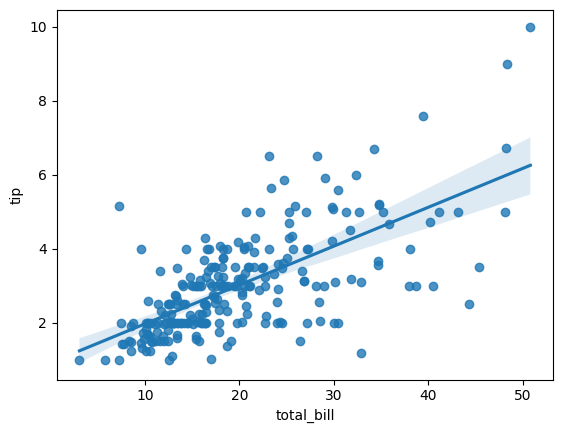

In [41]:
sns.regplot(x='total_bill', y='tip', data=tips)

plt.show()

❓Now, try also to use a `FacetGrid` to plot two regplots (one for smokers only, one for non-smokers). What conclusion can you draw?

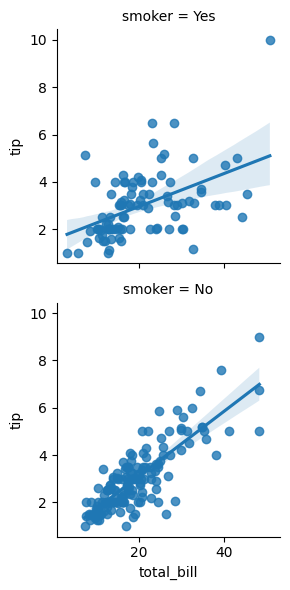

In [42]:
g = sns.FacetGrid(tips, row="smoker")

# Map regplot to each facet
g.map(sns.regplot, "total_bill", "tip")

## DataFrame-wide analysis with pairplot

❓ A very useful tool to identify **all correlations between all pairs of dataframe's columns** is the [`seaborn.pairplot`](https://seaborn.pydata.org/generated/seaborn.pairplot.html):

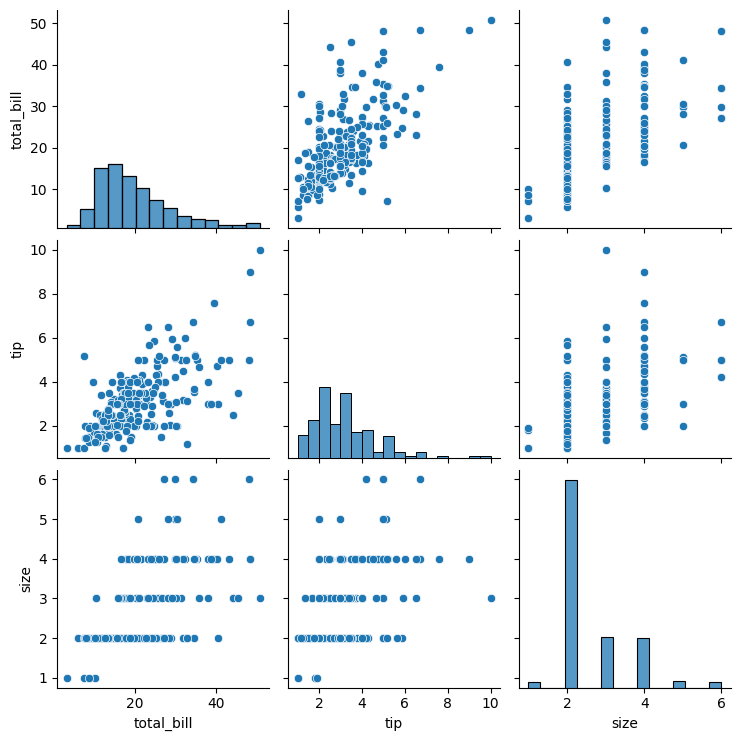

In [43]:
tips = sns.load_dataset("tips")

# Create a pairplot of the tips dataset
sns.pairplot(tips)